In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample = np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
namesInSample = ["hares", "lynxes", "carrots"]

years = sample[:, 0]
hares = sample[:, 1]
lynxes = sample[:, 2]
carrots = sample[:, 3]

№1, 3

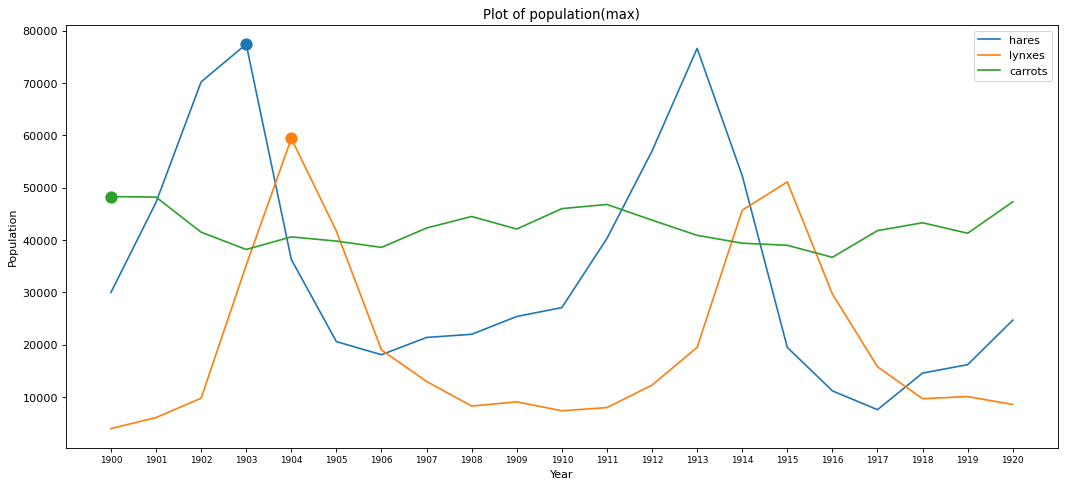

In [3]:
fig = plt.figure(figsize = (16,7), dpi=80)
fig.patch.set_facecolor('xkcd:white')


plt.plot(years, hares, label = namesInSample[0])
plt.plot(years, lynxes, label = namesInSample[1])
plt.plot(years, carrots, label = namesInSample[2])

_s = 100
plt.scatter(years[np.argmax(hares)], np.max(hares), s=_s)
plt.scatter(years[np.argmax(lynxes)], np.max(lynxes), s=_s)
plt.scatter(years[np.argmax(carrots)], np.max(carrots), s=_s)

plt.ylabel('Population')
plt.xlabel('Year')
plt.title("Plot of population(max)")
plt.xticks(years ,fontsize=8)
plt.legend()
plt.show()

№2

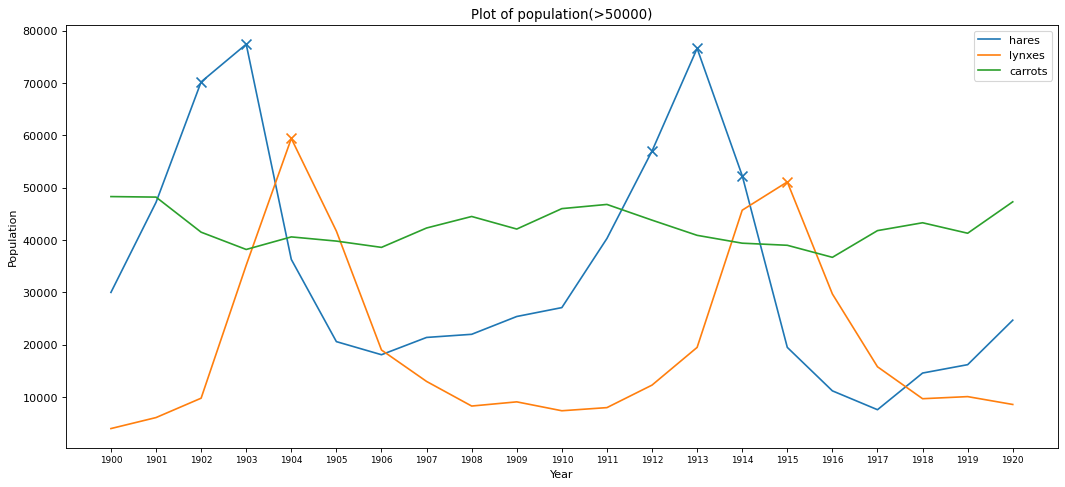

In [4]:


fig = plt.figure(figsize = (16,7), dpi=80)
fig.patch.set_facecolor('xkcd:white')


plt.plot(years, hares, label = namesInSample[0])
plt.plot(years, lynxes, label = namesInSample[1])
plt.plot(years, carrots, label = namesInSample[2])

_s = 80
plt.scatter(years[hares > 50000], hares[hares > 50000], marker='x', s=_s)
plt.scatter(years[lynxes > 50000], lynxes[lynxes > 50000], marker='x', s=_s)
plt.scatter(years[carrots > 50000], carrots[carrots > 50000], marker='x', s=_s)

plt.ylabel('Population')
plt.xlabel('Year')
plt.title("Plot of population(>50000)")
plt.xticks(years, fontsize=8)
plt.legend()
plt.show()






№4

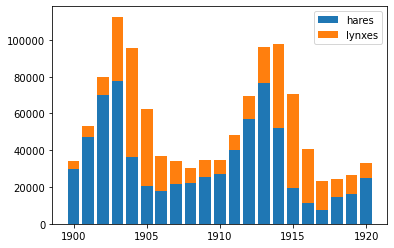

In [12]:
_, ax = plt.subplots()
ax.bar(years, hares, label=namesInSample[0])
ax.bar(years, lynxes, bottom=hares, label = namesInSample[1])

ax.legend()

№ 5

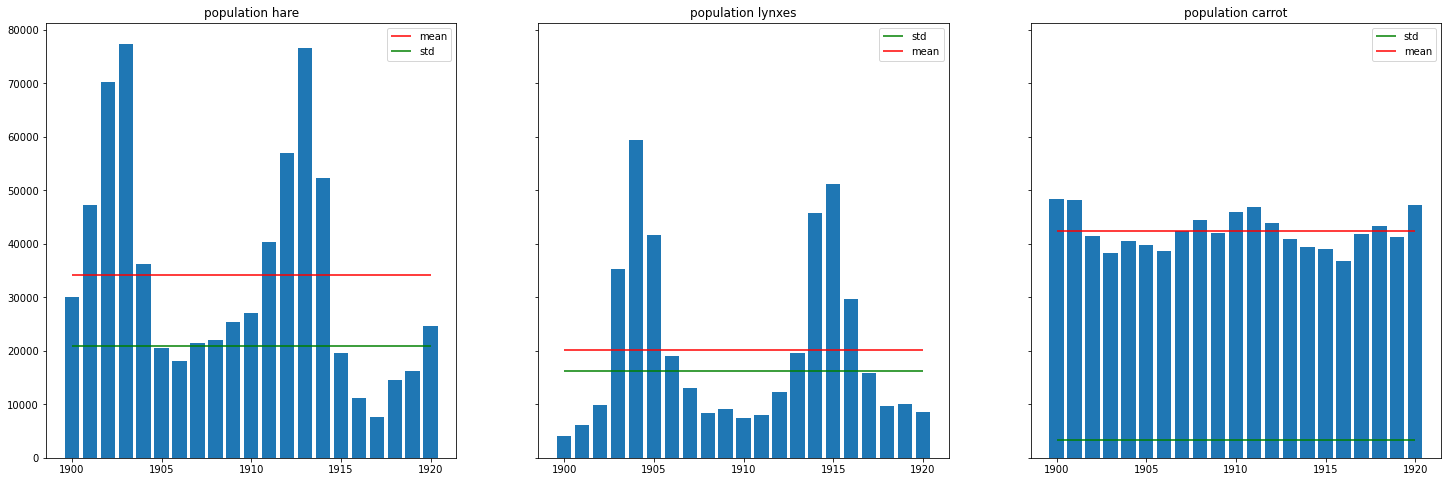

In [5]:
fig, ax = plt.subplots(1, 3,  figsize=(25,8), sharey=True, sharex=True)

hares_mean = np.mean(hares)
lynxes_mean = np.mean(lynxes)
carrots_mean = np.mean(carrots)

hares_std = np.std(hares)
lynxes_std = np.std(lynxes)
carrots_std = np.std(carrots)


ax[0].bar(years, hares)
ax[0].hlines(hares_mean, 1900, 1920, color='red', label='mean')
ax[0].hlines(hares_std, 1900, 1920, color='green',label='std')
ax[0].set_title('population hare')

ax[1].bar(years, lynxes)
ax[1].hlines(lynxes_std, 1900, 1920, color='green',label='std')
ax[1].hlines(lynxes_mean, 1900, 1920, color='red', label='mean')
ax[1].set_title('population lynxes')


ax[2].bar(years, carrots)
ax[2].hlines(carrots_std, 1900, 1920, color='green', label='std')
ax[2].hlines(carrots_mean, 1900, 1920, color='red', label='mean')
ax[2].set_title('population carrot')

for i in range(3):
    ax[i].legend()


№6

In [6]:
notes = list(map(lambda x: "H" if x else "L", hares > lynxes))
notes

['H',
 'H',
 'H',
 'H',
 'L',
 'L',
 'L',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'H',
 'L',
 'L',
 'L',
 'H',
 'H',
 'H']

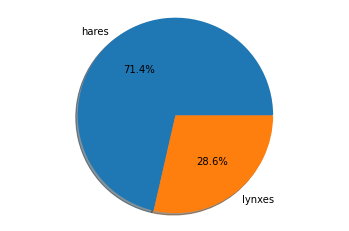

In [7]:
fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('xkcd:white')

ax1.pie(100 * np.unique(notes, return_counts=True)[1] / len(notes), labels=[namesInSample[0], namesInSample[1]], autopct='%1.1f%%', shadow=True)
ax1.axis('equal') 

plt.show()

№7

In [8]:
np.corrcoef(lynxes, hares)[0, 1]

0.07189206073535573

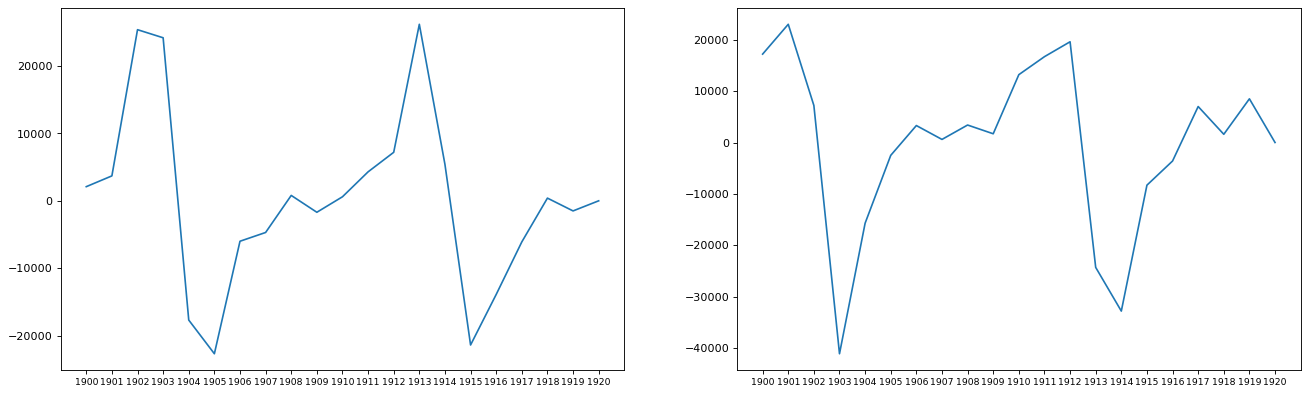

In [9]:
changePopulLynxes = np.zeros(lynxes.shape[0])
changePopulLynxes[:-1] = lynxes[1:] - lynxes[:-1]

changePopulHares = np.zeros(hares.shape[0])
changePopulHares[:-1] = hares[1:] - hares[:-1]

fig, ax = plt.subplots(1, 2, figsize=(20,6), dpi=80,  sharex=True)
ax[0].plot(years, changePopulLynxes)
ax[0].set_xticks(years, fontsize=5)
ax[0].tick_params(axis='x', labelsize='small')

ax[1].plot(years, changePopulHares)
ax[1].set_xticks(years, fontsize=5)
ax[1].tick_params(axis='x', labelsize='small')

№8

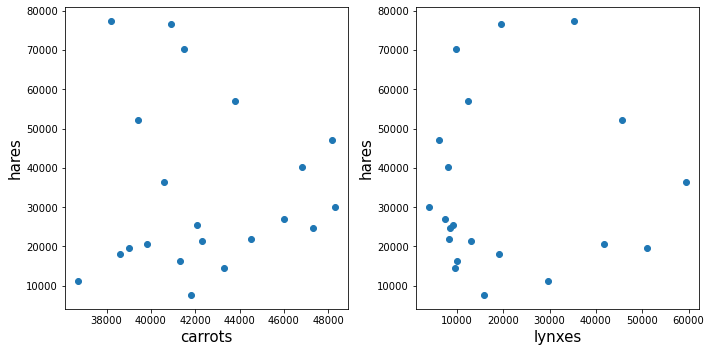

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(carrots, hares)
ax[0].set_xlabel(namesInSample[2], fontsize=15)
ax[0].set_ylabel(namesInSample[0], fontsize=15)


ax[1].scatter(lynxes, hares)
ax[1].set_xlabel(namesInSample[1], fontsize=15)
ax[1].set_ylabel(namesInSample[0], fontsize=15)

fig.tight_layout()
plt.show()

№9

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(sample[:-1, 2:], sample[:-1,1])

model.predict(sample[-1, 2:].reshape(1, 2)) / sample[-1, 1]

array([1.46000484])